# **Exploração e análise de dados de crédito com SQL e Python**

### A importância da análise exploratoria de dados EDA.

A análise exploratória de dados (EDA) é uma técnica fundamental para os negócios porque permite que as empresas obtenham insights valiosos a partir dos seus dados. Através da EDA, é possível identificar padrões, tendências e anomalias nos dados, o que ajuda as empresas a entenderem melhor o seu desempenho, as preferências dos clientes e as oportunidades de mercado.

Além disso, a EDA também ajuda as empresas a identificarem problemas nos dados, como valores ausentes ou inconsistências, que podem afetar a precisão das análises e das decisões baseadas em dados. Ao identificar esses problemas, as empresas podem tomar medidas para corrigi-los e garantir que os seus dados sejam confiáveis e precisos.

Em resumo, a EDA é uma técnica essencial para as empresas que desejam tomar decisões baseadas em dados sólidos e confiáveis. Ao realizar uma análise exploratória completa, as empresas podem obter insights valiosos e tomar decisões mais informadas e estratégicas.

## Metodologia.

Neste estudo, adotaremos a linguagem SQL atravez das ferramentas AWS Athena e bucket S3 para extração e criação de tabelas, além do uso do Python. A escolha dessas ferramentas se deve à sua capacidade de trabalhar com grandes volumes de dados de forma eficiente e escalável, permitindo a execução de consultas e análises complexas em um curto espaço de tempo. A utilização do Python também é vantajosa pela sua capacidade de manipulação de dados e geração de gráficos e visualizações, o que facilita a identificação de padrões e insights relevantes para o estudo em questão.

## Entendendo os dados.

Os dados representam informações de clientes de um banco e contam com as seguintes colunas: 

|Variavel           |Descrição                |Tipo do dado |
|-------------------|-------------------------|-------------|
|idade              |Idade do cliente         |int          |
|Sexo               |Sexo do cliente (F ou M) |string       |
|Dependentes        |Número de dependentes    |int          |
|Escolaridade       |Nível de escolaridade    |string       |
|Salario anual      |faixa salarial do cliente|string       |
|tipo_cartao | Tipo de cartão do cliente | string|
|qtd_produtos| Quantidade de produtos contratados no ultimos 12 meses| int|
|iteracoes_12m|quantidade de iterações/transacoes nos ultimos 12 meses| int|
|meses_inativo_12m|quantidade de meses que o cliente ficou inativo|int|
|limite_credito|limite de credito do cliente| float|
|valor_transacoes_12m | valor das transações dos ultimos 12 meses| float|
|qtd_transacoes_12m |quantidade de transacoes dos ultimos 12 meses| int


As tabelas foram criadas no **AWS Athena** junto com o **S3 Bucket** com os dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset


Acima temos uma breve explicação das colunas do nosso dataset, para efeito de conhecimento realizaremos também um query para especificar os tipos de dados de cada coluna.

**Query:** DESCRIBE credito

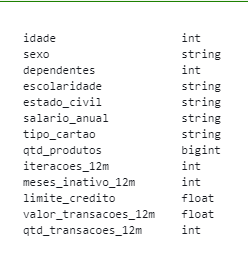


Para visualizar as 10 primeiras linhas do dataset.

**Query** :  SELECT * FROM credito LIMIT 10;

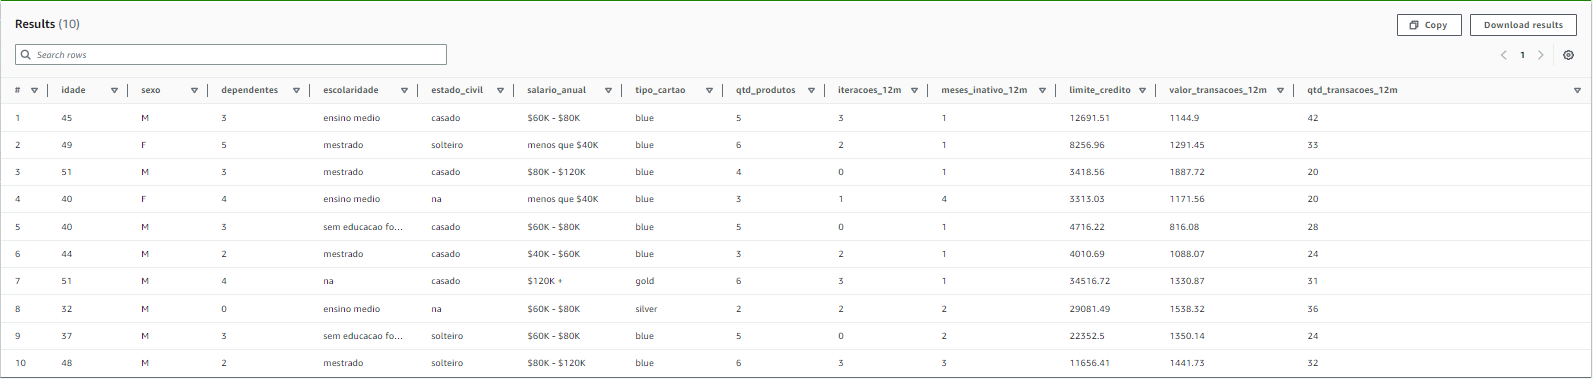





Através do SELECT limitado as 10 primeiras linhas já podemos observar que temos valores vazios nas nossas colunas, a seguir iremos consultar utilizando o SQL quais colunas possuem valores vazios (NA/NULL). 

O tratamento de valores nulos é uma etapa crucial na análise exploratória de dados, pois valores nulos podem afetar significativamente a qualidade da análise e dos resultados obtidos.

Valores nulos podem ocorrer por diferentes razões, como falhas na coleta de dados, erros de entrada ou processamento, ou porque os dados simplesmente não existem para aquela observação. Quando valores nulos são deixados sem tratamento, podem levar a erros na análise estatística, como bias, variância e erro padrão, além de afetar a interpretação dos resultados.

Ao tratar valores nulos, o proficional de dados pode escolher diferentes abordagens, como excluir as observações que possuem valores nulos, substituir os valores nulos por um valor médio ou mediano, ou utilizar técnicas mais avançadas, como imputação de dados. A escolha da abordagem depende do tipo de dados e do objetivo da análise.

##### Escolaridade.

**Query**: select count(*), escolaridade from credito group by escolaridade
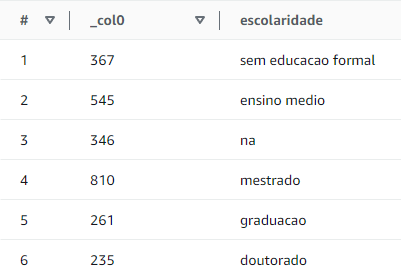

O AWS Athena permite que o usuário copie os resultados obtidos através das querys para o formato texto que podem ser transformados em um pequeno dataframe através do pandas (biblioteca para criação e manipulação de dataframes do Python) ou do excel para gerar os gráficos que podem dar um maior entendimento sobre a distribuição dos nossos dados.

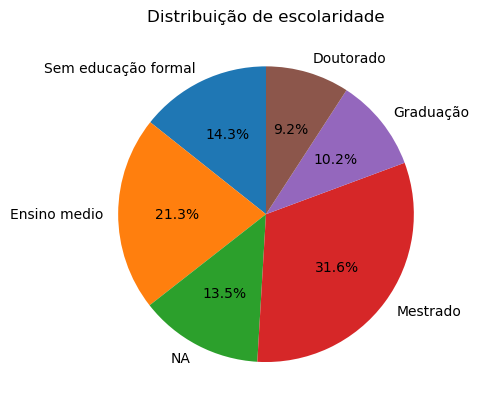

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar DataFrame
data = {'quanti': [367, 545, 346, 810, 261, 235],
        'escolaridade': ['Sem educação formal', 'Ensino medio', 'NA', 'Mestrado', 'Graduação', 'Doutorado']}

df = pd.DataFrame(data)

# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(df['quanti'], labels=df['escolaridade'], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribuição de escolaridade')

plt.show()

##### Estado civíl.

**Query:** select count(*), estado_civil e from credito group by estado_civil

Desta vez iremos extrair a tabela criada para um arquivo CSV. 

In [2]:
#criando o dataframe
civil = pd.read_csv('estado_civil.csv')
civil = civil.rename(columns={'_col0': 'quanti', 'e': 'Estado civil'})

#Verificando o dataframe
display(civil)

,quanti,Estado civil
0,116,na
1,1521,casado
2,161,divorciado
3,766,solteiro


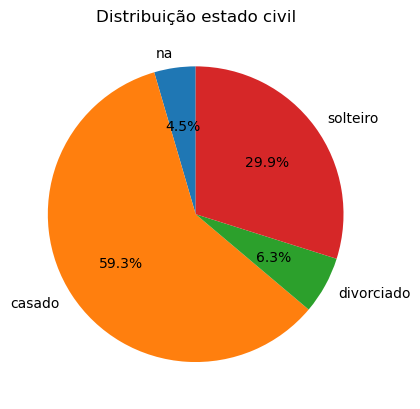

In [3]:
# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(civil['quanti'], labels=civil['Estado civil'], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribuição estado civil')

plt.show()

A seguir iremos repetir o processo acima para as demais variáveis que possam ser de interesse.

##### Salário anual.

**Query:** select count(*), salario_anual e from credito group by salario_anual

,quanti,Faixa salarial
0,488,$80K - $120K
1,451,$60K - $80K
2,467,$40K - $60K
3,222,$120K +
4,701,menos que $40K
5,235,na


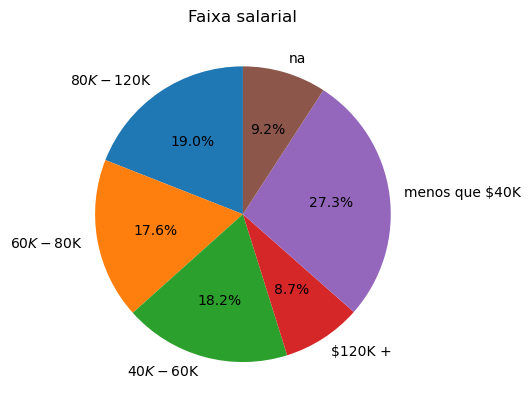

In [4]:
#criando o dataframe
salario = pd.read_csv('salario.csv')
salario = salario.rename(columns={'_col0': 'quanti', 'e': 'Faixa salarial'})

#Verificando o dataframe
display(salario)

# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(salario['quanti'], labels=salario['Faixa salarial'], autopct='%1.1f%%', startangle=90)
ax.set_title('Faixa salarial')

plt.show()

##### Tipo cartão.

**Query:** select count(*), tipo_cartao e from credito group by tipo_cartao

,quanti,Tipo de Cartão
0,2,platinum
1,93,silver
2,2453,blue
3,16,gold


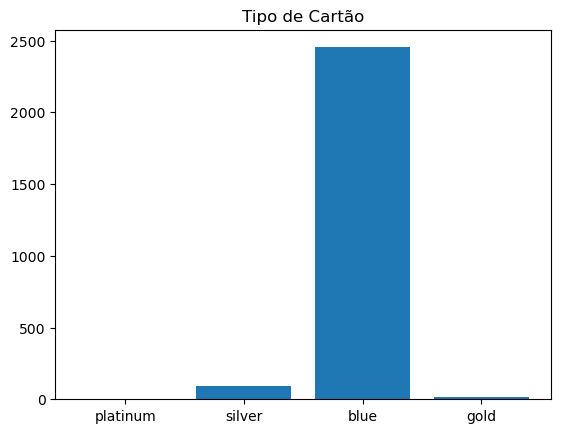

In [5]:
#criando o dataframe
cartao = pd.read_csv('cartao.csv')
cartao = cartao.rename(columns={'_col0': 'quanti', 'e': 'Tipo de Cartão'})

#Verificando o dataframe
display(cartao)

# Criar o gráfico de barras
fig, ax = plt.subplots()
ax.bar(cartao['Tipo de Cartão'], cartao['quanti'])
ax.set_title('Tipo de Cartão')

plt.show()

##### Distruibuição do sexo declarado.

**Query:** select count(*), sexo from credito group by sexo

,quanti,sexo
0,1001,F
1,1563,M


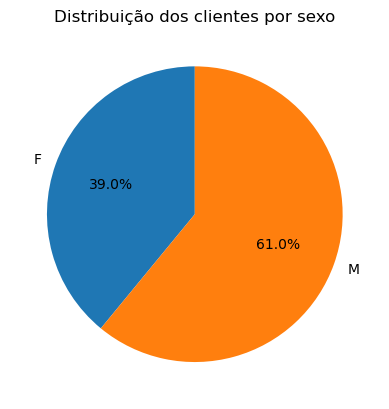

In [6]:
#criando o dataframe
sexo = pd.read_csv('sexo.csv')
sexo = sexo.rename(columns={'_col0': 'quanti', 'e': 'sexo'})

#Verificando o dataframe
display(sexo)

# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(sexo['quanti'], labels=sexo['sexo'], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribuição dos clientes por sexo')

plt.show()

## Analise de dados.

### A partir das pesquisas que realizamos podemos extrair algumas informações.


**Sobre a escolaridade:**

- A maioria dos nossos clientes 51% deles tem graduação ou nível de escolaridade acima disso (graduação:10,2%, doutorado: 9,2% e mestrado: 31,6%) e 13,5% dos clientes não responderam a questão a respeito da faixa de escolaridade.

**Sobre o estado civil:**

- A maioria dos clientes (59,3%) é casado.

**Sobre a faixa salarial:**

- A maior parte dos clientes ganha abaixo de 40 mil anualmente, seguido dos clientes que ganham de 80 mil a 120 mil. 

- 9,2% dos clientes deixaram de responder esta questão, o que levanta o questionamento da razão desta informação não ser obrigatória numa instituição financeira que provê cartões de crédito. 

**Sobre o tipo de cartão:**

- A maioria absoluta dos clientes tem o tipo de cartão blue.

**Sobre a distribuição de sexo.**

- 61% dos clientes se daclara do sexo masculino.

#### **Concluindo**

Alguns insights que podemos retirar neste momento são: 

- Não seria interessante para a instituição financeira realizar upgrade do tipo de cartão para os clientes com faixa salarial acima de 60 mil anualmente eles representam 45,3% do total dos clientes.

- Podemos realizar uma campanha com foco nos clientes que não responderam sobre sua faixa salarial? E entender melhor este público?.

### Hipóteses.

Após a análise que realizamos surgem algumas hipóteses a respeito dos nossos clientes.

Como vimos pela distribuição dos tipos de cartões de crédito, puderiamos criar campanhas de marketing focadas nos clientes de faixa salarial maior que 60 mil anualmente pois eles representam uma faixa muito grande dos nossos clientes que poderiam realizar o upgrade do seu cartão de crédito para faixas mais altas.

- Pensando nisso qual é o perfil dos nossos clientes para a criação de tal campanha.

**Query:** select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

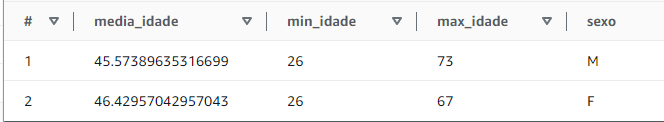

Não há uma diferença muito significativa na distruição de idade media entre homens e mulher dentre nossos clientes a idade minina é a mesma e a idade maxima não variou muito.



- Quais são clientes com limite de credito mais alto e qual tipo de cartão eles possuem.

**Query:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

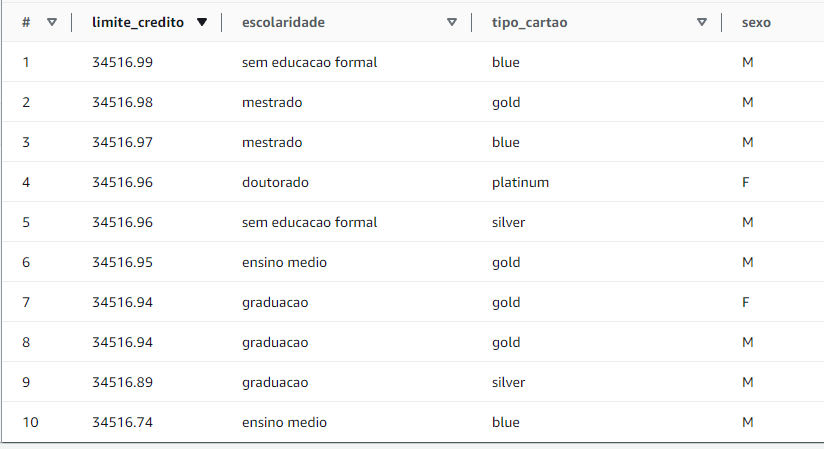

Dentre os 10 clientes com maiores limites de crédito 3 deles tem cartão do tipo blue incluindo o cliente com maior limite de crédito, outros 2 com cartão silver e apenas 1 cliente com cartão platinum.

- A respeito das transações realizadas nos ultimos 12 meses.

A média de transações realizadas no cartão de crédito é um dos fatores que podem ser levados em consideração pelo emissor na hora de definir ou ajustar o limite de crédito do cliente. Vamor verificar esta questão no nosso banco de dados.

**Query:** select avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

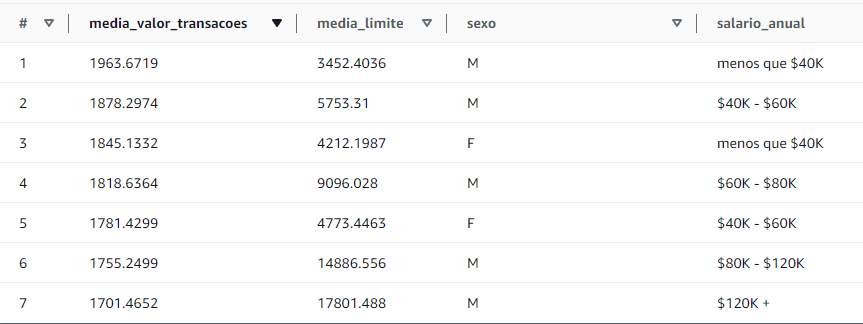

Podemos observar que as pessoas que movimentam menos durante o ano possuem limite de crédito menor.

## *Logo identificamos um público alvo para nossa campanha de upgrade de seu cartão, aqueles com maiores limites de crédito, faixa salarial acima de 60 mil anualmente e que possuem cartão blue.*


# Conclusão.

Realizar uma análise exploratória de dados através do SQL tem algumas vantagens importantes:

- Eficiência: O SQL é otimizado para trabalhar com grandes quantidades de dados, permitindo a análise de grandes conjuntos de dados com eficiência.
- Facilidade de acesso aos dados: O SQL permite acessar dados armazenados em bancos de dados, permitindo que os usuários realizem análises sem a necessidade de exportar os dados para outras ferramentas.
- Capacidade de realizar consultas complexas: O SQL oferece uma ampla variedade de recursos para filtrar, agrupar e ordenar dados, permitindo que os usuários realizem consultas complexas para identificar padrões e insights em seus dados.
- Consistência dos resultados: Ao contrário de algumas ferramentas de análise de dados, o SQL produz resultados consistentes e repetíveis, independentemente da plataforma ou configuração do sistema.
- Integração com outras ferramentas: O SQL pode ser facilmente integrado com outras ferramentas de análise de dados, como o Python ou o R, permitindo que os usuários combinem a eficiência do SQL com a flexibilidade dessas ferramentas.

Realizar uma análise exploratória de dados através do SQL pode oferecer vantagens significativas em termos de eficiência, facilidade de acesso aos dados, capacidade de realizar consultas complexas, consistência dos resultados e integração com outras ferramentas.
